---
title: "Optimization"
author: "Pablo Winant"
format:
    html: default
    ipynb: default
---

In this tutorial you will learn to code and use common optimization algorithms for static models.


---

## Profit optimization by a monopolist

A monopolist produces quantity $q$ of goods X at price $p$. Its cost function is $c(q) = 0.5 + q (1-qe^{-q})$

The consumer's demand for price $p$ is $x(p)=2 e^{-0.5 p}$ (constant elasticity of demand to price).

__Write down the profit function of the monopolist and find the optimal production (if any). Don't use any library except for plotting.__



In [89]:
using Plots

In [1]:
x(p) = 2exp(-0.5p)
c(q) = 0.5+q*(1-q*exp(-q))
xi(p) = -2log(p/2)
pi(q) = -2log(q/2)
π_q(q) = xi(q)*q - c(q)
π_p(p) = p*x(p) - c(x(p))

π_p (generic function with 1 method)

In [2]:
# plot w.r.t. q

qvec = range(0.001, 5; length=100)

# π_q_vec = [π_q(q) for q in qvec]

# vectorized call of π_q: ( . means vectorized or element-by-element  )
π_q_vec = π_q.(qvec);

# plot the result
plot(qvec, π_q_vec; xlabel="quantity", ylabel="profit")


UndefVarError: UndefVarError: `plot` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [3]:
# plot w.r.t. p

pvec = range(0.001, 5; length=100)

π_p_vec = π_p.(pvec);

# plot the result
plot(pvec, π_p_vec; ylabel="\$\\pi(p)\$", xlabel="\$p\$")

UndefVarError: UndefVarError: `plot` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [4]:
# this function repeats twice the call (x(p))
π_p(p) = p*x(p) - c(x(p))

# let's create an intermediary variable
# 
# option1: create a function block

# option2: create a block
π_p(p) = begin
    xx = x(p)
    p*xx - c(xx)
end


π_p (generic function with 1 method)

In [94]:
# let' s implement newton raphson

We will perform the optimization with respect o the quantities
But first we need to compute the hessian of the profit function

In [13]:
pi(q) = -2log(q/2)
p_1(q) = -2/q
p_2(q) = 2/q^2

c(q) = 0.5 + q*(1-q*exp(-q))


c_1(q) = 1-2*q*exp(-q) + q^2*exp(-q)
c_2(q) = -exp(-q)*(q^2-4q+2)

π_q(q) = pi(q)*q - c(q)
π_1(q) = p_1(q)*q + pi(q) - c_1(q)
π_2(q) = p_2(q)*q + 2p_1(q) - c_2(q)

π_2 (generic function with 1 method)

In [14]:
f(x) = 1-x^2-x^3
f_1(x) = -2x-3x^2
f_2(x) = -2-6x

f_2 (generic function with 1 method)

In [15]:
"""
τ_ϵ: criterium for optimality
τ_η: criterium for progress
"""
function newton_raphson(f,f_p,f_pp,x0; T=10,τ_ϵ=1e-10,τ_η=1e-10, verbose=true)

    for t=1:T

        f1 = f_p(x0)
        f2 = f_pp(x0)
        δ = -f1/f2 # newton step
        x1 = x0 + δ # new guess

        # with both criteria
        ϵ = abs(f1)
        if ϵ<τ_ϵ
            return x1 # problem solved
        end
        η = abs(δ)
        if η<τ_η
            error("No progress, problem not solved.")
        end

        # ternary operator :    a ? b : c     -> if a do b otherwise do c
        verbose ? println("t=$t ; ϵ=$ϵ ;  η=$η") : nothing

        # # with only η assuming the algorithm converges
        # η = abs(δ)
        # if η<τ_η
        #     return x1 # xolution found
        # end


        x0 = x1
    end

    error("No convergence")
    
end

newton_raphson

In [16]:
newton_raphson(f,f_1, f_2, 0.1)

t=1 ; ϵ=0.23 ;  η=0.08846153846153847
t=2 ; ϵ=0.023476331360946748 ;  η=0.01134543894766943
t=3 ; ϵ=0.0003861569547458862 ;  η=0.00019296673655466368
t=4 ; ϵ=1.1170848424967084e-7 ;  η=5.585423276574868e-8


3.2343297114061484e-29

In [17]:
# let's try it on the profit function

qmax = newton_raphson(π_q, π_1, π_2, 1.0; T=50, τ_η=1e-12)

t=1 ; ϵ=1.245826197708667 ;  η=0.5261358226465827
t=2 ; ϵ=0.33021007594907004 ;  η=0.082229160985156
t=3 ; ϵ=0.02037843952968632 ;  η=0.005743880464955386
t=4 ; ϵ=7.798058772645611e-5 ;  η=2.214853592309787e-5
t=5 ; ϵ=1.1422293111351678e-9 ;  η=3.2443264163392274e-10


0.5618593676638843

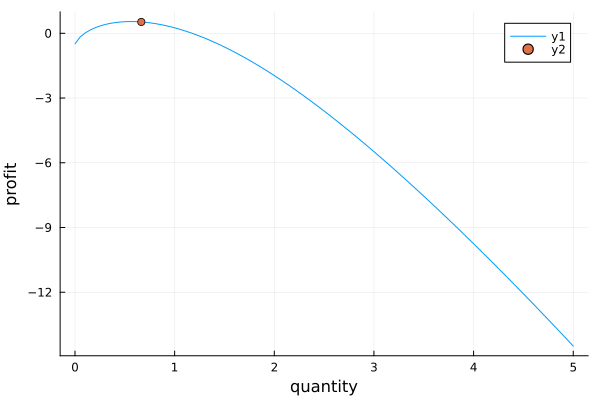

In [100]:
π_max = π_q(qmax)

# plot w.r.t. q

qvec = range(0.001, 5; length=100)

# π_q_vec = [π_q(q) for q in qvec]

# vectorized call of π_q: ( . means vectorized or element-by-element  )
π_q_vec = π_q.(qvec);

# plot the result
pl = plot(qvec, π_q_vec; xlabel="quantity", ylabel="profit")
scatter!(pl, [qmax], [π_max])
pl

In [101]:
m0 = eps(Float64)
e0 = sqrt(m0)

1.4901161193847656e-8

In [103]:
π_1(0.1) , (π_q(0.1+e0) - π_q(0.1))/e0

(4.792091008999541, 3.1633835211396217)

In [70]:
1 + m0/2 == 1

true

In [73]:
m0/2 + (1 + -1)

1.1102230246251565e-16

---

## Constrained optimization

Consider the function $f(x,y) = 1-(x-0.5)^2 -(y-0.3)^2$.

__Use Optim.jl to maximize $f$ without constraint. Check you understand diagnostic information returned by the optimizer.__

In [2]:
using Optim

In [3]:
f(x,y) = 1 - (x-0.5)^2 - (y-0.3)^2

f (generic function with 1 method)

In [4]:
f(1,2)

-2.1399999999999997

In [5]:
# define another function that takes a vector as input
f(x::Vector) = f( x[1], x[2] )

f (generic function with 2 methods)

In [6]:
f( [0.1, 0.2 ])

0.83

In [7]:
x0 = [0.4, 0.7]

2-element Vector{Float64}:
 0.4
 0.7

In [11]:
Optim.optimize # fully qualified name

optimize    # was imported by using Optim

optimize (generic function with 67 methods)

In [14]:
result = optimize( u -> -f(u) , x0)
result

 * Status: success

 * Candidate solution
    Final objective value:     -1.000000e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    26
    f(x) calls:    55


In [16]:
Optim.minimizer(result)

2-element Vector{Float64}:
 0.49998195944788515
 0.2999575964340524

In [19]:
result = optimize( u -> -f(u) , x0, LBFGS(); autodiff = :forward)
result


 * Status: success

 * Candidate solution
    Final objective value:     -1.000000e+00

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.00e-01 ≰ 0.0e+00
    |x - x'|/|x'|          = 8.00e-01 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.70e-01 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.70e-01 ≰ 0.0e+00
    |g(x)|                 = 0.00e+00 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1
    f(x) calls:    3
    ∇f(x) calls:   3


In [20]:
Optim.minimizer(result)

2-element Vector{Float64}:
 0.5
 0.3

__Now, consider the constraint $x<0.3$ and maximize $f$ under this new constraint.__

In [25]:
x1 = [0.2, 0.2] # choose a valid initial guess
result = optimize( u -> -f(u) , [-Inf, -Inf], [0.3, Inf], x1 )
result

 * Status: success

 * Candidate solution
    Final objective value:     -9.600000e-01

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 2.00e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 6.66e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.81e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.14e-08 ≰ 0.0e+00
    |g(x)|                 = 2.00e-10 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    60
    ∇f(x) calls:   60


In [26]:
Optim.minimizer(result)

2-element Vector{Float64}:
 0.2999999998
 0.3000000000007093

__Reformulate the problem as a root finding problem with lagrangians. Write the complementarity conditions.__

__Solve using NLSolve.jl__

---

## Consumption optimization

A consumer has preferences $U(c_1, c_2)$ over two consumption goods $c_1$ and $c_2$.

Given a budget $I$, consumer wants to maximize utility subject to the budget constraint $p_1 c_1 + p_2 c_2 \leq I$.

We choose a Stone-Geary specification where

$U(c_1, c_2)=\beta_1 \log(c_1-\gamma_1) + \beta_2 \log(c_2-\gamma_2)$

__Write the Karush-Kuhn-Tucker necessary conditions for the problem.__

__Verify the KKT conditions are sufficient for optimality.__

__Derive analytically the demand functions, and the shadow price.__

__Interpret this problem as a complementarity problem and solve it using NLSolve.__

__Produce some nice graphs with isoutility curves, the budget constraint and the optimal choice.__

